In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.plotting.register_matplotlib_converters() # to avoid some warnings

In [2]:
df = pd.read_csv('data.csv', index_col=0)

In [3]:
# Convert date to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
# Reshape data to find the last date with corresponding values
df_pivot = df.pivot(values='value', index='Date', columns='variable').sort_index()
df_pivot.head()

variable,Chi,Dallas,Houston,LA,NY,PHL,Phoenix,SF,San Antonio,San Diego,San Jose
Date,,,,,,,,,,,
1995-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1995-04-01,101.46,101.46,101.66,100.96,101.56,101.90,101.67,100.01,102.03,100.58,101.15
1995-07-01,102.62,103.19,102.15,102.72,102.86,103.74,103.84,100.83,103.62,101.61,101.96
1995-10-01,103.56,103.97,102.70,102.99,103.00,104.25,104.95,100.95,104.35,101.57,102.43
1996-01-01,104.67,105.07,104.24,102.83,104.64,105.23,107.07,100.80,105.70,101.67,102.92


In [5]:
# Get the last date
last_day = df_pivot.last('D')
last_day

variable,Chi,Dallas,Houston,LA,NY,PHL,Phoenix,SF,San Antonio,San Diego,San Jose
Date,,,,,,,,,,,
2019-07-01,191.28,280.21,290.75,380.07,295.72,283.08,305.6,477.67,262.53,357.89,452.71


In [6]:
# Reshape data to make it easier to iterate over it
last_day = last_day.stack().sort_values()
last_day

Date        variable   
2019-07-01  Chi            191.28
            San Antonio    262.53
            Dallas         280.21
            PHL            283.08
            Houston        290.75
            NY             295.72
            Phoenix        305.60
            San Diego      357.89
            LA             380.07
            San Jose       452.71
            SF             477.67
dtype: float64

In [7]:
# In this step we equally space values that are too close to each other. So or labels don't overlap.
# You can skip this step if lines are not too close too each other at the end
mask = last_day.diff() < 10
last_day[mask] = 8
last_day[mask | mask.shift(-1)] = last_day[mask | mask.shift(-1)].cumsum()

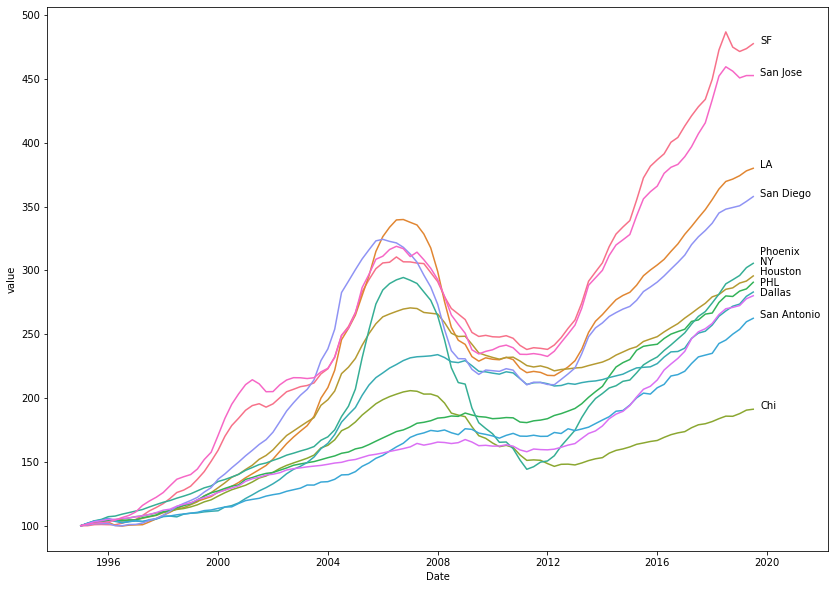

In [8]:
plt.figure(figsize=(14,10))
_ = sns.lineplot(x='Date', y='value', hue='variable', data=df, legend=False)

# Iterate over series
for (date, label), value in last_day.iteritems():
    # Annotate label, DateOffset moves you labels to the right
    plt.annotate(label, (date + pd.DateOffset(90), value))
    # Move the right limit of the x axis to the right
_ = plt.xlim(right=date + pd.DateOffset(1000))